In [1]:
# Testing configuration of upper interface of SAMs with different OH- headgroups percentages
# (polarities). The surface is configured as a grid of atoms (C and O)
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os
import pdbfile_v2 as pdb

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
path = "/Users/eixeres/Desktop/Plots_grid_9x9/"
#path = "/Users/burbol2/Desktop/PlotsLoops/Copy2"
os.chdir(path)

In [38]:
########################### SET PARAMETERS FOR THE SIZE ###############################

Nx = 3 # number of gridpoints in x-direction (carbons)
Ny = 3 # number of gridpoints in y-direction (carbons)

xcopies = 6
ycopies = 6

a0 = 5.0 # set lattice vector length

In [6]:
# Approximate position of head groups on top of the surface so that the bottom ones are approx. at z=0
CCbondangle = 109.5
CCbondlength = 1.54
N_carbons = 11
zlast = N_carbons*CCbondlength*sin(radians(CCbondangle/2))*cos(np.pi/6) #vertical length of the chain without upper head group
zlast = zlast + 2.0 # add approx. the bond lengths of C-O and H-O (upper head group)
print zlast

13.9805157135


In [7]:
"""Copy unit cell """

def copycell(Nx, Ny, pType, xcopies, ycopies):
    for j in range(ycopies):
        for l in range(Ny):
            for k in range(Nx):
                for i in range(xcopies):
                    #if (j!=0 and i!=0):
                        #print '[' , k+(i*Nx) , ',' , l+(j*Ny) , '] = [', k ,',', l ,']', pType[k,l]
                        pType[k+(i*Nx),l+(j*Ny)] = pType[k,l]
    return pType

In [12]:
################################## FUNCTION TO PLOT HEAT MAP  ######################################
def plotheat(pType, pc, Nx, Ny, loop):
    # HEATMAP
    #   create array with 0s where there is O
    #   and ones where there is C:
    Z = np.zeros([Nx,Ny],dtype=int)
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'C':
                Z[i,j] = 1
    
    # plot the heatmap
    fig, ax = plt.subplots()
    ax.imshow(Z, cmap=plt.cm.winter, interpolation='nearest')
              
    myfile = 'pc' + str(int(pc*100)) + '_heat_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_heat_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    #fig.savefig(myfile ,format='pdf')

In [28]:
################################## FUNCTION TO PLOT GRID  ######################################
def plotgrid(pType, a0, pc, Nx, Ny, text, loop):
    
    xPos, yPos = pdb.creategrid(a0, Nx, Ny)
    
    SizeOfDots = 8
    fig, ax = plt.subplots()
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'O':
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
            else:
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='yellow')
                
    plt.title("Pc = " + str(int(pc*100)) + text, fontsize= 14)
    plt.grid()
    plt.show()
    myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    fig.savefig(myfile ,format='pdf')

In [10]:
########################### EXCHANGE CARBONS WITH OXYGENS #############################

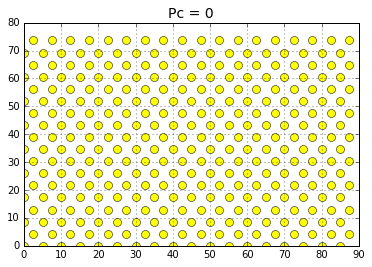

In [49]:
# Percentage 0%
loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0 
pc = 0

mytext = '' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, a0, pc, Nx*xcopies, Ny*ycopies, mytext, loop)

0.111111111111


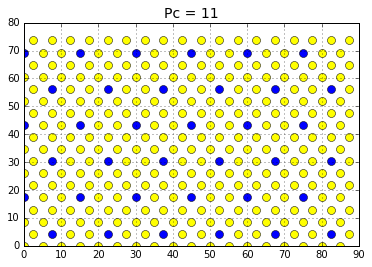

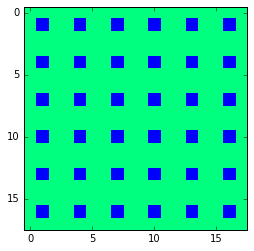

In [39]:
# Percentage 11%
loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0
pType[1,1] = 'O' 
n_oxys = n_oxys + 1
pc = float(n_oxys)/float(Nx*Ny)
print pc
mytext = '' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, a0, pc, Nx*xcopies, Ny*ycopies, mytext, loop)
plotheat(pType, pc, Nx*xcopies, Ny*ycopies, loop)

0.222222222222


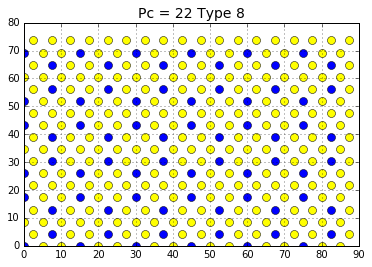

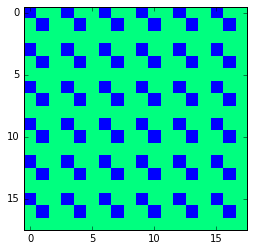

In [41]:
# Percentage 22%
loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0

# Type 0 -> Good!
#pType[0,0] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1

# Type 1
#pType[0,2] = 'O'
#n_oxys = n_oxys + 1
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1

# Type 2
#pType[0,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,2] = 'O'
#n_oxys = n_oxys + 1

# Type 3 -> Good!
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,2] = 'O'
#n_oxys = n_oxys + 1

# Type 4
#pType[0,2] = 'O'
#n_oxys = n_oxys + 1
#pType[1,1] = 'O'
#n_oxys = n_oxys + 1

# Type 5
#pType[0,1] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1

# Type 6 -> Maybe Good??
#pType[0,2] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1

# Type 7
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1

# Type 8 -> Good!
pType[0,0] = 'O'
n_oxys = n_oxys + 1
pType[1,1] = 'O'
n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
print pc
mytext = ' Type 8' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, a0, pc, Nx*xcopies, Ny*ycopies, mytext, loop)
plotheat(pType, pc, Nx*xcopies, Ny*ycopies, loop)

0.333333333333


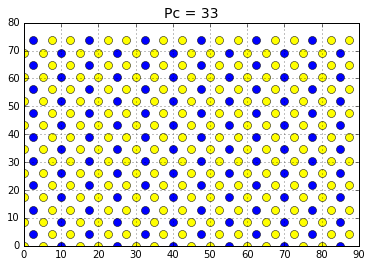

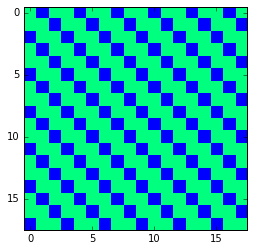

In [43]:
# Percentage 33%
loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0

# Type 0
pType[2,0] = 'O'
n_oxys = n_oxys + 1
pType[0,1] = 'O'
n_oxys = n_oxys + 1
pType[1,2] = 'O'
n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
print pc
mytext = '' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, a0, pc, Nx*xcopies, Ny*ycopies, mytext, loop)
plotheat(pType, pc, Nx*xcopies, Ny*ycopies, loop)

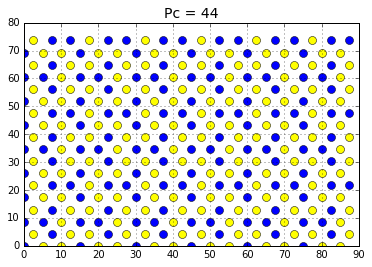

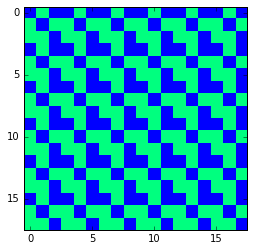

In [46]:
# Percentage 44%
loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0

"""
# Type 0 -> Good!
pType[1,0] = 'O'
n_oxys = n_oxys + 1
pType[0,1] = 'O'
n_oxys = n_oxys + 1
pType[2,1] = 'O'
n_oxys = n_oxys + 1
pType[1,2] = 'O'
n_oxys = n_oxys + 1


# Type 2
pType[0,0] = 'O'
n_oxys = n_oxys + 1
pType[2,0] = 'O'
n_oxys = n_oxys + 1
pType[0,2] = 'O'
n_oxys = n_oxys + 1
pType[2,2] = 'O'
n_oxys = n_oxys + 1
"""

# Type 3 -> Very Good!
pType[0,0] = 'O'
n_oxys = n_oxys + 1
pType[2,2] = 'O'
n_oxys = n_oxys + 1
pType[0,2] = 'O'
n_oxys = n_oxys + 1
pType[1,1] = 'O'
n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
mytext = '' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, a0, pc, Nx*xcopies, Ny*ycopies, mytext, loop)
plotheat(pType, pc, Nx*xcopies, Ny*ycopies, loop)

In [37]:
################ NOW WE CREATE THE CHOSEN SURFACES (CHOSEN BY LOOKING AT OUTPUT PICTURES)   ################
# 1. Create pType
# 2. Run next cell

In [50]:
xPos, yPos = pdb.creategrid(a0, Nx, Ny)
pdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)